In [1]:
%run ../mlp/Model_Cifar10_MLP.ipynb

<h1 style="color:#987753"><center>============= CREATE LINEAR MODEL =============</center></h1>

In [2]:
def hyperParams():

    modelParams = {"Layers":[{"neurons":256, "activation":"relu","dropOut":False},
                    {"neurons":256, "activation":"sigmoid", "dropOut":False},
#                     {"neurons":256, "activation":"relu", "dropOut":0.3},
#                     {"neurons":128, "activation":"relu", "dropOut":False},
#                     {"neurons":256, "activation":"sigmoid", "dropOut":False},
                    {"neurons":256, "activation":"relu", "dropOut":0.2},
                    {"neurons":10, "activation":"softmax", "dropOut":False}],
                   "loss":"categorical_crossentropy",
                   "optimizer":"Adam",
                   "metrics":"accuracy",
                   "epochs":100,
                   "batchSize":255
                 }
    return modelParams

In [3]:
def createLinearModel():
    
    model = Sequential()
    model.add(Flatten(input_shape= (32,32,3)))
    model.add(Dense(1, activation='tanh'))
    model.add(Dense(10, activation='softmax'))
    
    model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                   optimizer="adam",
                   metrics=['accuracy'])
    model.summary()
    return model

In [4]:
def fitModel(model,trainImages, trainLabels, testImges, testLabels, epochs, batchSize):
    
    start_time = time.time()
    ################################ CALCULATE RUNTIME - START ###############################
    model.fit(trainImages, trainLabels,
                       epochs=epochs,
                       batch_size=batchSize, verbose=1, validation_data=(testImges, testLabels))
    ################################ CALCULATE RUNTIME - END ###############################
    print(humanizeTime(time.time() - start_time))
    return model, humanizeTime(time.time() - start_time)

In [7]:
def main():
    global ID
    ID = random.randint(1,1000000)
    print("================================ ID RUN %s ================================" % (ID))
    (trainImages, testImages, trainLabels, testLabels) = loadData()
    
    print("================================ SHAPE ================================")
    print("\t- NB TRAIN SAMPLES %s WIDTH %s HEIGHT %s COLOR %s" % (trainImages.shape))
    print("\t- NB TEST SAMPLES %s WIDTH %s HEIGHT %s COLOR %s" % (testImages.shape))
    
    print("================================ PLOT FIGURE ================================")
    plotFigure(trainImages, trainLabels, nbSamples=25)
    
    print("================================ ONEHOT ENCODING ================================")
    trainLabels, testLabels = oneHoteEncoding(trainLabels, testLabels)
    
    print("================================ CREATE MODEL ================================")
    model = createLinearModel()
    
    print("================================ RESHAPE INPUTS ================================")
    trainImages, testImages = reshapeInput(trainImages, testImages)
    
    print("================================ FIT MODEL ================================")
    epochs = 80
    batchSize = 100
    model, runTime = fitModel(model, trainImages, trainLabels, testImages, testLabels, epochs, batchSize)
    
    print("================================ EVALUATE MODEL ================================")
    resultEV = evaluateModel(model, testImages, testLabels)
    
    print("================================ PREDICITION ================================")
    prediction, result = predictionPercent(model, testImages, testLabels)
    
    print("================================ PLOT PREDICITION ================================")
    plotPredictedResult(prediction, testImages, testLabels)
    
#     print("================================ SAVE MODEL ================================")
#     saveModel(model)
    
#     print("================================ GENERATE EXCEL HYPERPARAMS ================================")
#     jsonDf = generateExcelParams(params, resultEV, runTime)
#     jsonDf.head()

================================ ID RUN 647500 ================================
================================ SHAPE ================================
	- NB TRAIN SAMPLES 50000 WIDTH 32 HEIGHT 32 COLOR 3
	- NB TEST SAMPLES 10000 WIDTH 32 HEIGHT 32 COLOR 3
================================ PLOT FIGURE ================================


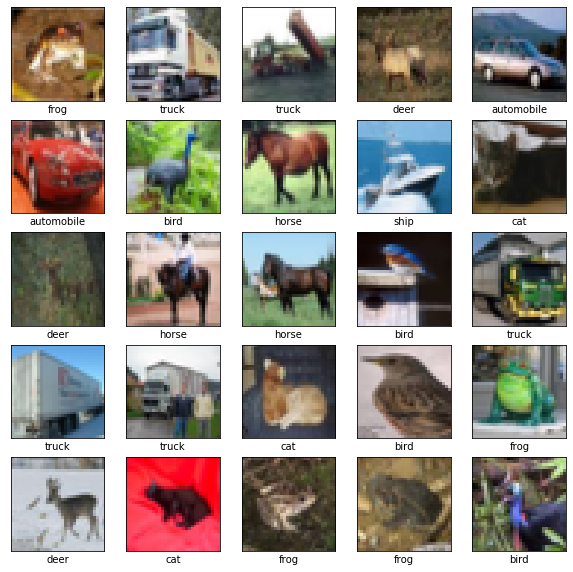

================================ ONEHOT ENCODING ================================
================================ CREATE MODEL ================================
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 3073      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                20        
Total params: 3,093
Trainable params: 3,093
Non-trainable params: 0
_________________________________________________________________
================================ RESHAPE INPUTS ================================
================================ FIT MODEL ================================
Train on 50000 samples, validate on 10000 samples
Epoch 1/80
500

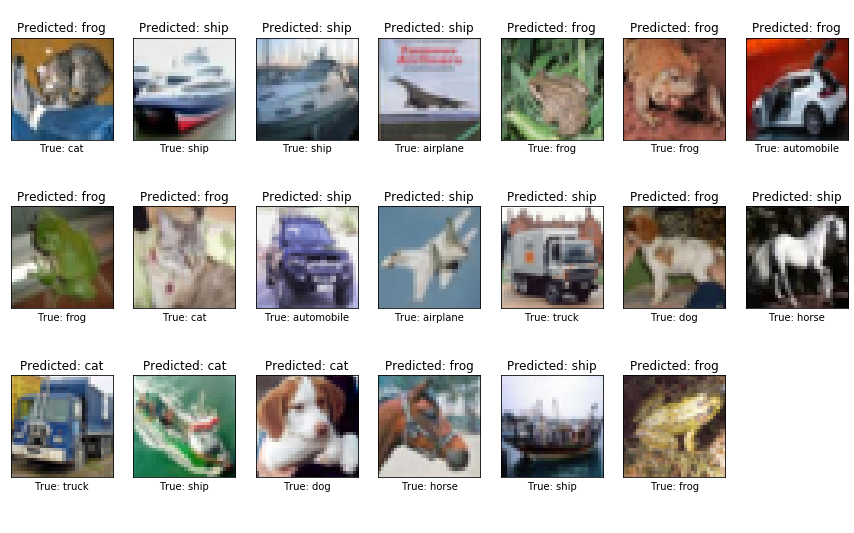

In [8]:
main()